<img src= "https://upload.wikimedia.org/wikipedia/commons/8/84/Inpelogo.png" align="left" width="64"/>


<h1 style="color:#336699; text-align: center" >Tutorial APSIM Next Generation</h1>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Grazieli Rodigheri<sup><a href="https://orcid.org/0000-0002-9916-1167"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Divisão de Observação da Terra e Geoinformática, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/><br/>
    Contact: <a href="mailto:grazielirodigheri@gmail.com">grazielirodigheri@gmail.com</a>
    </div>

<br/>



<hr>

# 1. Install APSIM Next Gen

### 1.1 Install apsimx and other required libraries

In [41]:
# Install and load the needed libraries

if (!require("apsimx")) {
  devtools::install_github("femiguez/apsimx")
  library("apsimx")
}
if (!require("dplyr")) {
  install.packages("dplyr", repos = "http://cran.irsn.fr")
  library("dplyr")
}
if (!require("ggplot2")) {
  install.packages("ggplot2", repos = "http://cran.irsn.fr")
  library("ggplot2")
}
if (!require("nasapower")) {
  install.packages("nasapower")
  library("nasapower")
}
if (!require("tidyverse")) {
  install.packages("tidyverse")
  library("tidyverse")
}

Carregando pacotes exigidos: tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### 1.2 List all APSIM simulation examples

In [10]:
# Get apsim examples folder
ex_dir <- auto_detect_apsimx_examples()
print(list.files(ex_dir))

Warning message in auto_detect_apsimx():
"Searching the Windows registry for APSIM-X"


 [1] "AgPasture.apsimx"             "Agroforestry"                
 [3] "Barley.apsimx"                "Canola.apsimx"               
 [5] "CanolaGrazing.apsimx"         "Chickpea.apsimx"             
 [7] "Chicory.apsimx"               "CLEM"                        
 [9] "ControlledEnvironment.apsimx" "CsvWeather.apsimx"           
[11] "Eucalyptus.apsimx"            "EucalyptusRotation.apsimx"   
[13] "Factorial.apsimx"             "FodderBeet.apsimx"           
[15] "Grapevine.apsimx"             "Graph.apsimx"                
[17] "Maize.apsimx"                 "ManagerExamples"             
[19] "Mungbean.apsimx"              "Oats.apsimx"                 
[21] "OilPalm.apsimx"               "Optimisation"                
[23] "Peanut.apsimx"                "Pinus.apsimx"                
[25] "PlantainForage.apsimx"        "Potato.apsimx"               
[27] "RedClover.apsimx"             "Rotation.apsimx"             
[29] "SCRUM.apsimx"                 "Sensitivity"             

<hr>

# 2. Check parameters and apsimx configuration

### 2.1 Create an apsimx simulation

First step is choose a name to the simulation:

In [11]:
# Set a simulation name
ORIGINAL_SIM_NAME <- "Soybean.apsimx"
SIM_NAME          <- "Soybean-tests4.apsimx"

Then, copy simulation example to current folder:

In [12]:
# Create a copy of the simulation
file.copy(
    paste0(ex_dir, "/", ORIGINAL_SIM_NAME), 
    paste0("./", SIM_NAME)
)

[1] TRUE

### 2.2 Inspect Simulation Nodes

Available "node" values: 
- "Clock"
- "Weather"
- "Soil"
- "SurfaceOrganicMatter"
- "MicroClimate"
- "Crop"
- "Manager"
- "Report"
- "Other"

Available "soil.child" values:
- "Metadata"
- "Water"
- "InitialWater"
- "Chemical"
- "Physical"
- "Analysis"
- "SoilWater"
- "InitialN"
- "CERESSoilTemperature"
- "Sample"
- "Nutrient"
- "Organic"

<h1 style="color:red; font-size:100%">PS: We can inspect any node. Let's see some examples.<h1>

### Inspect Crop

In [13]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Crop"
)



|parm         |value |
|:------------|:-----|
|StartDate    |1-sep |
|EndDate      |1-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |


### Inspect Clock

In [14]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Clock"
)

Start: 1900-01-01T00:00:00 
End: 2000-12-31T00:00:00 


### Inspect Weather

In [15]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Weather"
)

Met file: %root%\Examples\WeatherFiles\Dalby.met 


### Inspect Soil

In [16]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Soil"
)

Soil Type:  Clay 
Latitude:  -27.58184 
Longitude:  151.3202 
Soil children: Physical SoilWater Organic Chemical InitialWater InitialN Temperature Nutrient 


|parm              |value                                                  |
|:-----------------|:------------------------------------------------------|
|$type             |Models.Soils.Soil, Models                              |
|RecordNumber      |0                                                      |
|ASCOrder          |Vertosol                                               |
|ASCSubOrder       |Black                                                  |
|SoilType          |Clay                                                   |
|LocalName         |NA                                                     |
|Site              |Norwin                                                 |
|NearestTown       |Norwin                                                 |
|Region            |Darling Downs and Granite Belt                     

NOTE: This manager node contains 3 parameters (SowingFertiliser, Harvesting and SowingRule). We can explore some of them.

In [17]:
# Manager SowingRule
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager",
    parm = list("SowingRule", NA)
)


Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingRule 


|parm         |value |
|:------------|:-----|
|StartDate    |1-sep |
|EndDate      |1-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |



<hr>

# 3. Obtain weather and soil data from another source

### 3.1 Get NASA POWER meteorological data

Define latitude, longitude, start and end dates of the field:

In [18]:
# Set the location of the field study
lonlat <- c(-52.9, -28.23)

# Period of weather data
dates <- c("2015-01-01", "2018-04-10")

<div class="alert">
  <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
  IMPORTANT: The function <b>get_power_apsim_met</b> below will download the .met file to the current folder. The filename of this file can be set in the parameter <b>filename</b>. 
</div>

In [19]:
# Get the weather data
power_data <- get_power_apsim_met(
    lonlat = lonlat, 
    dates = dates,
    filename = "power.met"
)

In [20]:
# View the dataframe of data
head(power_data)
summary(power_data)

,year,day,radn,maxt,mint,rain,rh,windspeed
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015,1,5.85,26.61,22.24,109.49,93.50,4.23
2,2015,2,14.07,23.25,16.67,2.89,86.56,2.70
3,2015,3,27.98,27.05,14.29,0.05,72.75,1.50
4,2015,4,32.09,28.86,16.41,0.00,76.06,1.77
5,2015,5,28.96,29.50,16.85,4.66,79.75,1.41
6,2015,6,29.91,27.23,21.09,0.34,86.00,2.14


year,months,days,high_maxt,high_mint,avg_maxt,avg_mint,low_maxt,low_mint,rain_sum,radn_sum,radn_avg
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1:12,1:31,31.94,22.46,24.62,14.38,12.20,0.55,1636.16,5752.51,15.76
2016,1:12,1:31,30.89,22.87,23.66,13.14,10.48,-2.52,1591.54,6262.68,17.11
2017,1:12,1:31,32.10,22.58,24.62,13.90,9.40,-3.91,2090.74,6304.86,17.27
2018,1:12,1:31,32.48,21.48,27.53,17.07,22.32,10.98,507.69,2082.03,20.82


Use the **plot** function to plot the met data:

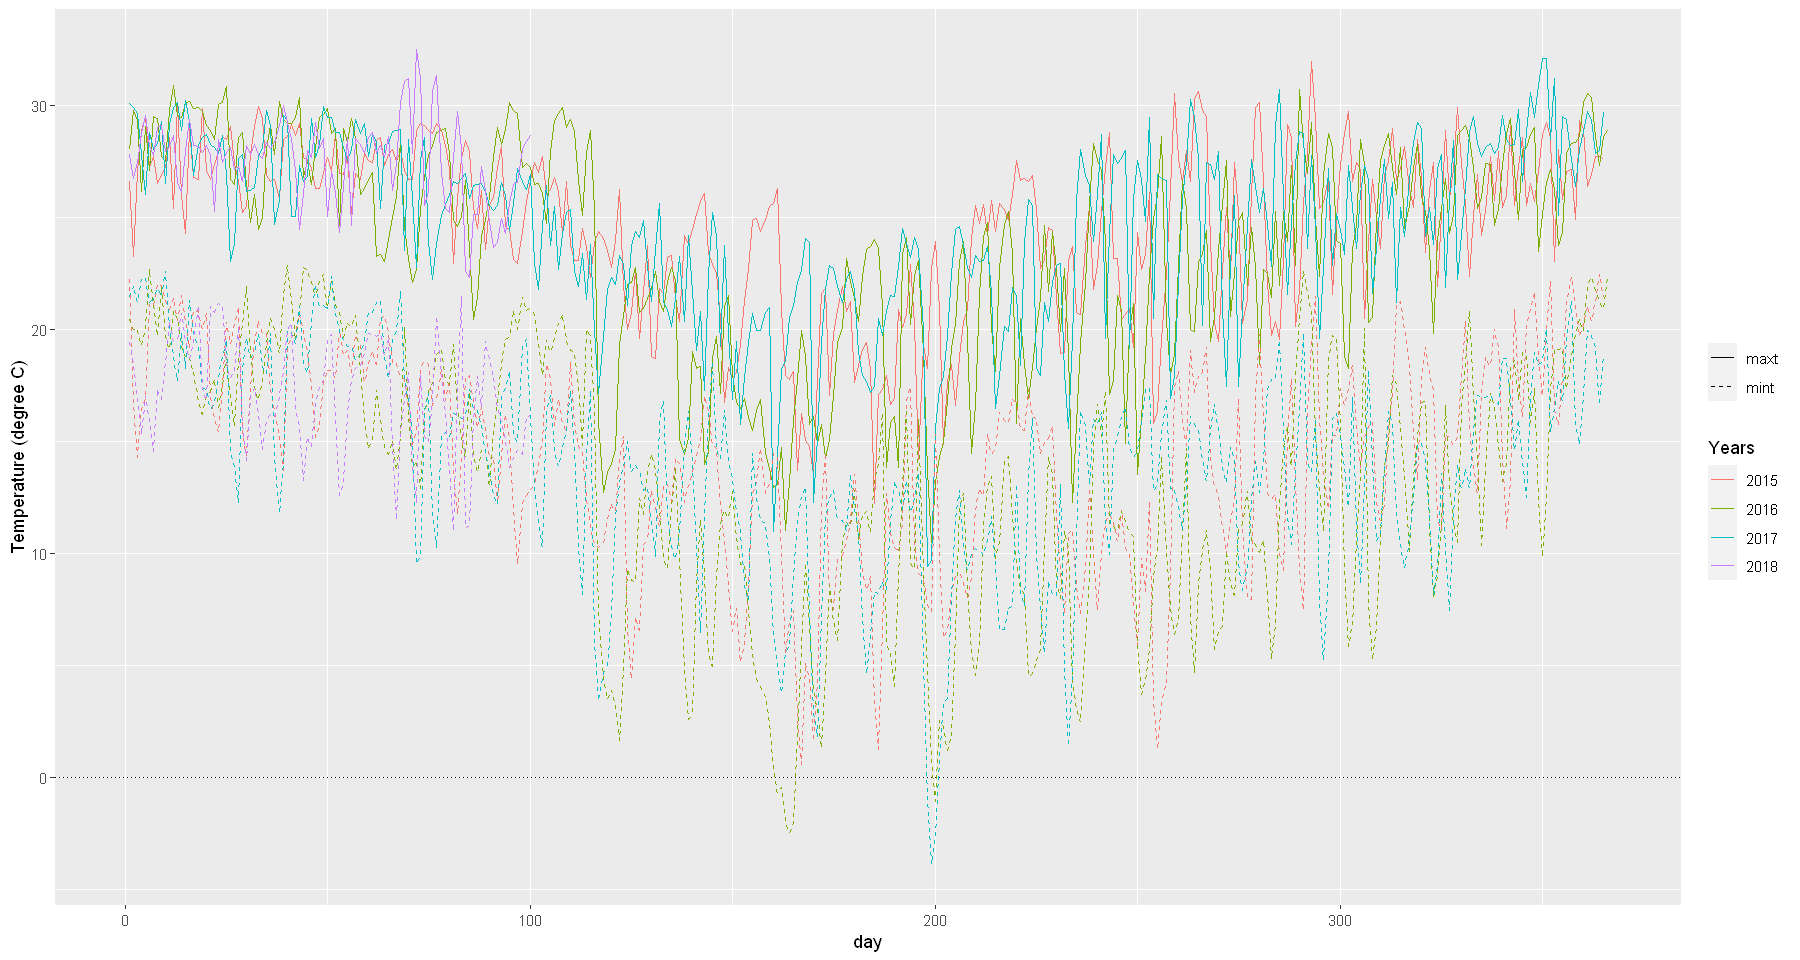

In [21]:
# Define the size of the chart
options(repr.plot.width=15, repr.plot.height=8)

# Plot the data
plot(power_data)

<div class="alert">
  <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
  IMPORTANT: If you prefer, you can pivot columns to rows in a tidy format and plot data using ggplot. 
</div>

In [22]:
# Generate a tidy dataframe
df_power <- tidyr::pivot_longer(power_data, cols = -c(year, day), names_to = "variable", values_to = "value")
head(df_power)

year,day,variable,value
<dbl>,<int>,<chr>,<dbl>
2015,1,radn,5.85
2015,1,maxt,26.61
2015,1,mint,22.24
2015,1,rain,109.49
2015,1,rh,93.50
2015,1,windspeed,4.23


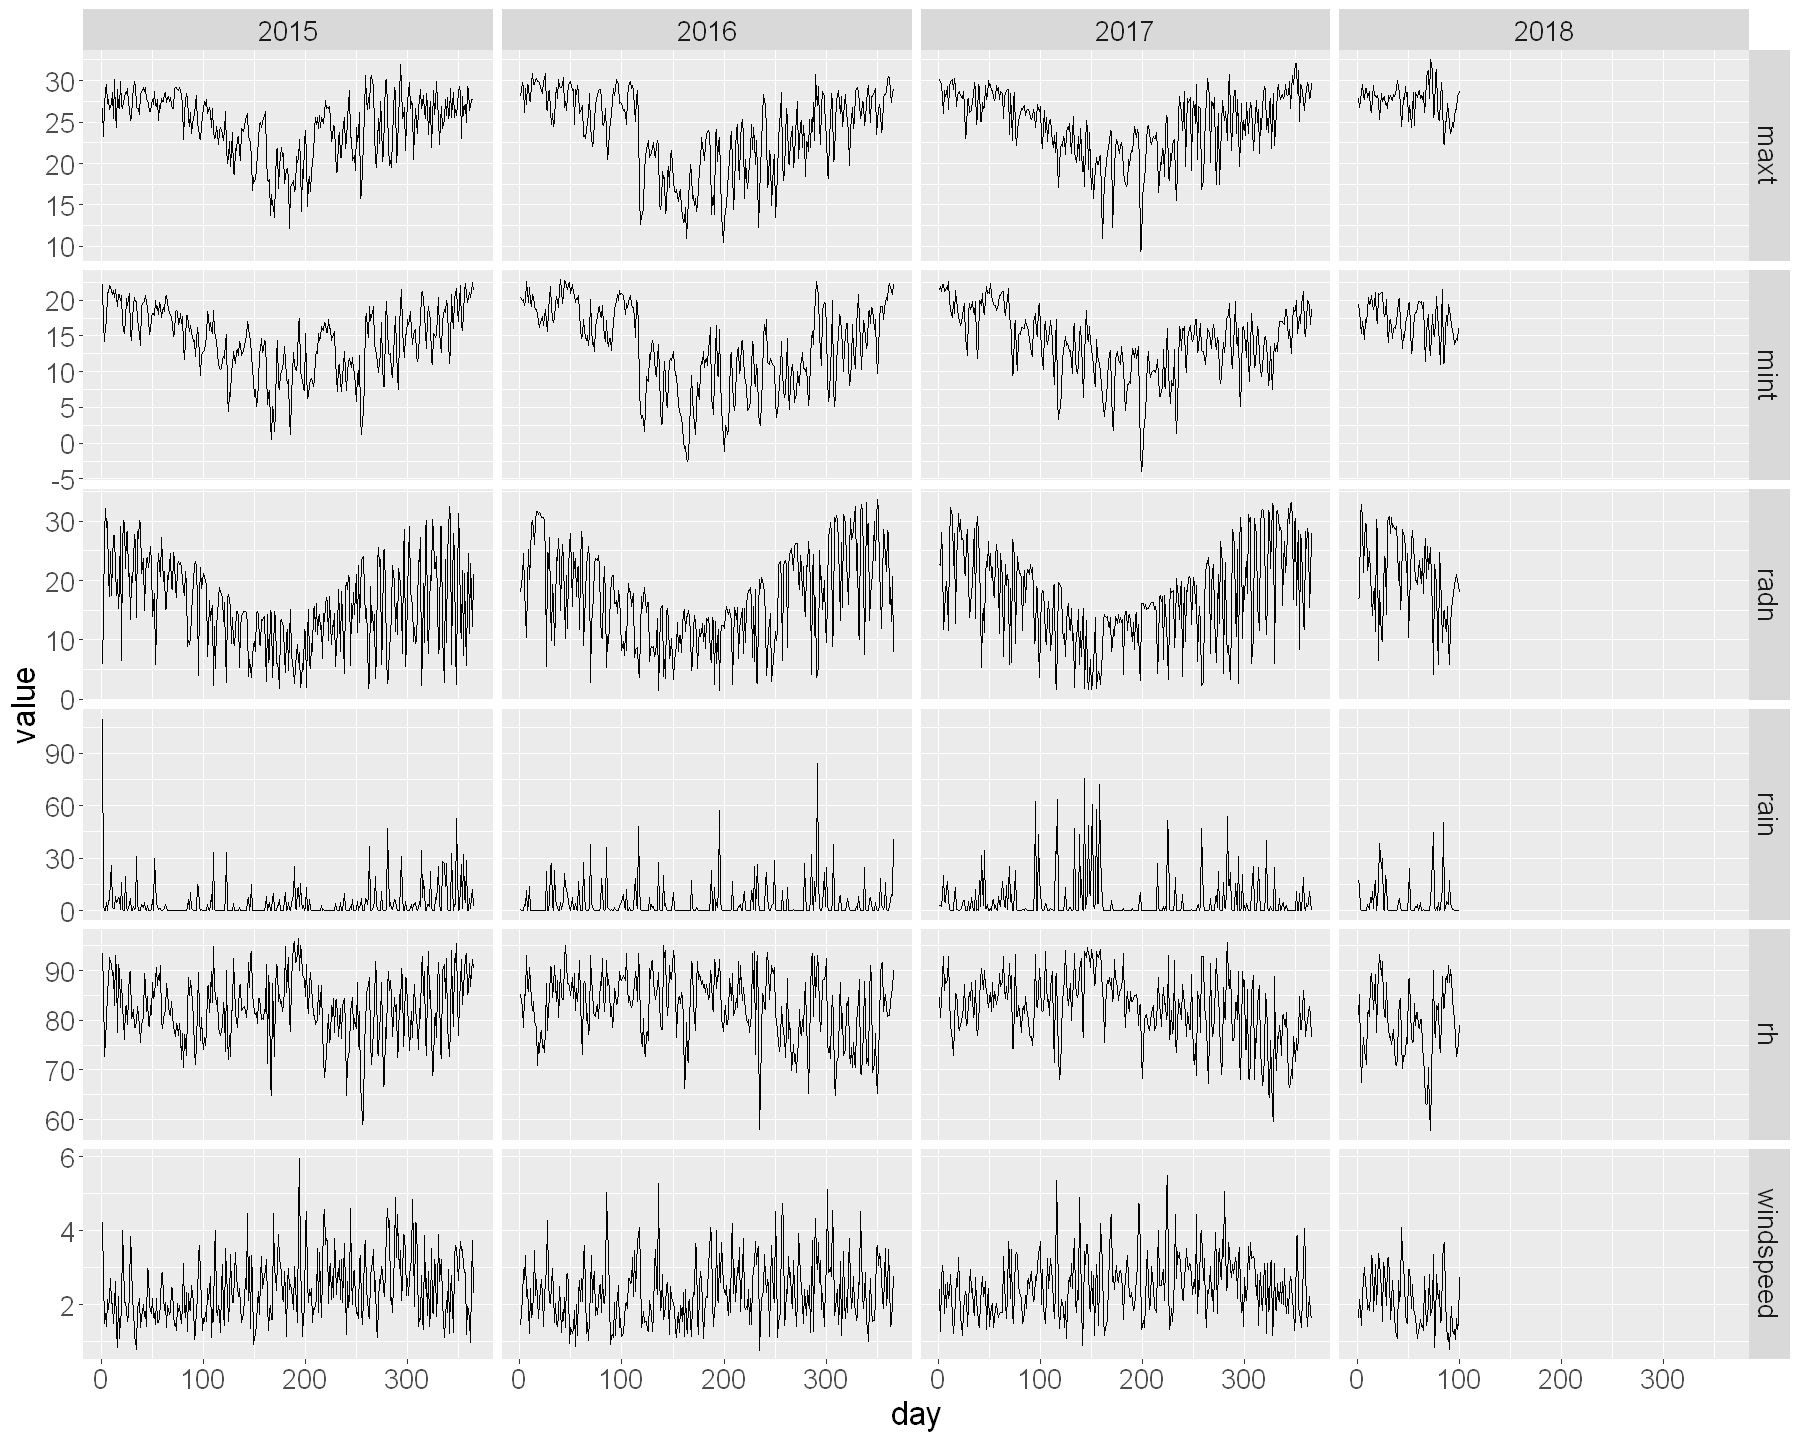

In [23]:
# Define the size of the chart
options(repr.plot.width=15, repr.plot.height=12)

# Plot the chart for all meteorological data
ggplot(df_power) + 
    geom_line(aes(x = day, y = value)) +
    facet_grid(variable ~ year, scales = "free_y") +
    theme(text = element_text(size = 20))

### 3.2 Get soil data from ISRIC

We already seted the coordinates for weather data, so we can use the same to get soil profile:

In [24]:
# Retrieve soil profile
isric_soil <- get_isric_soil_profile(
    lonlat = lonlat
)

In [25]:
# Check the profile information:
head(isric_soil$soil)

,Depth,Thickness,BD,AirDry,LL15,DUL,SAT,KS,Carbon,SoilCNRatio,⋯,Maize.LL,Maize.XF,Soybean.KL,Soybean.LL,Soybean.XF,Wheat.KL,Wheat.LL,Wheat.XF,CEC,Nitrogen
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0-5,50,1.03,0.1217828,0.2435655,0.3758188,0.4547182,126.50597,5.78,12,⋯,0.2435655,1,0.06000000,0.2435655,1,0.06000000,0.2435655,1,233,437
2,5-15,100,1.08,0.2565085,0.2565085,0.3886890,0.4625238,103.17656,2.85,12,⋯,0.2565085,1,0.04912385,0.2565085,1,0.04912385,0.2565085,1,190,240
3,15-30,150,1.14,0.2677019,0.2677019,0.3995050,0.4700243,89.38960,2.02,12,⋯,0.2677019,1,0.04021920,0.2677019,1,0.04021920,0.2677019,1,192,208
4,30-60,300,1.17,0.3040410,0.3040410,0.4321012,0.4930030,56.41276,1.24,12,⋯,0.3040410,1,0.03292870,0.3040410,1,0.03292870,0.3040410,1,177,125
5,60-100,400,1.21,0.3192580,0.3192580,0.4456555,0.5038253,48.70834,0.93,12,⋯,0.3192580,1,0.02695974,0.3192580,1,0.02695974,0.3192580,1,174,90
6,100-200,1000,1.22,0.3170131,0.3170131,0.4436521,0.5019924,49.21887,0.94,12,⋯,0.3170131,1,0.02207277,0.3170131,1,0.02207277,0.3170131,1,176,80


<hr>

# 4. Change apsimx parameters and input data

All the nodes, childs and parameters we checked before we can modify for the apsimx simulation. We can do this using the function <b>edit_apsim</b>. 
</div>

<div class="alert">
    <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
    IMPORTANT: 
    <br>
    <br>
    Once you use the function <i>edit_apsimx</i> below with the parameter <i>overwrite</i> set to TRUE, the simulation file <i>.apsimx</i> will be overwritten. When set to FALSE, apsimx package create a new <i>.apsimx</i> simulation with edited values.
</div>

### 4.1 Change the met file

In [26]:
# Change the apsimx met file
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Weather", 
    value = "./power.met"
)

# Check the current met file
inspect_apsimx(
    file = SIM_NAME, 
    node = "Weather"
)

Edited (node):  Weather 
Edited (child):  none 
Edited parameters:  
New values:  ./power.met 
Created:  ./Soybean-tests4.apsimx 
Met file: ./power.met 


### 4.2 Change the soil data

In [27]:
# Change the soil data
edit_apsimx_replace_soil_profile(file = SIM_NAME, src.dir = '.', soil.profile = isric_soil, wrt.dir = '.', overwrite = T)

# Check the current soil profile
inspect_apsimx(
    file = SIM_NAME, 
    node = "Soil"
)

Created:  ./Soybean-tests4.apsimx 
Soil Type:  SoilType =  clay 
Latitude:  -28.23 
Longitude:  -52.9 
Soil children: Physical SoilWater Organic Chemical InitialWater InitialN Temperature Nutrient 


|parm              |value                                                  |
|:-----------------|:------------------------------------------------------|
|$type             |Models.Soils.Soil, Models                              |
|RecordNumber      |0                                                      |
|ASCOrder          |NA                                                     |
|ASCSubOrder       |NA                                                     |
|SoilType          |SoilType =  clay                                       |
|LocalName         |NA                                                     |
|Site              |NA                                                     |
|NearestTown       |NA                                                     |
|Region            |NA        

### 4.3 Edit SowingRule start and end dates

In [28]:
# Edit Manager => SowingRule => StartDate
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Manager", manager.child = "SowingRule", parm = "StartDate", 
    value = "3-nov"
)

# Edit Manager => SowingRule => EndDate
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Manager", manager.child = "SowingRule", parm = "EndDate", 
    value = "5-nov"
)

Edited (node):  Manager 
Edited (child):  SowingRule 
Edited parameters:  StartDate 
New values:  3-nov 
Created:  ./Soybean-tests4.apsimx 
Edited (node):  Manager 
Edited (child):  SowingRule 
Edited parameters:  EndDate 
New values:  5-nov 
Created:  ./Soybean-tests4.apsimx 


In [29]:
# Check if edit was successful
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager", 
    parm = list("SowingRule", NA)
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingRule 


|parm         |value |
|:------------|:-----|
|StartDate    |3-nov |
|EndDate      |5-nov |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |



### 4.4 Edit Simulation Clock

In [30]:
# Edit Clock => Start
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Clock", parm = "Start", 
    value = "2015-04-01T00:00:00 "
)

# Edit Clock => End
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Clock", parm = "End", 
    value = "2016-04-01T00:00:00 "
)

Edited (node):  Clock 
Edited (child):  none 
Edited parameters:  Start 
New values:  2015-04-01T00:00:00  
Created:  ./Soybean-tests4.apsimx 
Edited (node):  Clock 
Edited (child):  none 
Edited parameters:  End 
New values:  2016-04-01T00:00:00  
Created:  ./Soybean-tests4.apsimx 


In [31]:
# Check if edit was successful
inspect_apsimx(
    file = SIM_NAME, 
    node = "Clock"
)

Start: 2015-04-01T00:00:00  
End: 2016-04-01T00:00:00  


### 4.5 Edit Report output

In [32]:
# Edit Report
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Report", parm = "EventNames", 
    value = "[Clock].DoReport"
)

Edited (node):  Report 
Edited (child):  none 
Edited parameters:  EventNames 
New values:  [Clock].DoReport 
Created:  ./Soybean-tests4.apsimx 


In [33]:
# Check if edit was successful
inspect_apsimx(
    file = SIM_NAME, 
    node = "Report",
    parm = ("EventNames")                     
)



|EventNames           |
|:--------------------|
|[Soybean].Harvesting |
|[Clock].DoReport     |


<hr>

# 5. Run the simulation

Now that we have the .apsimx file configured and we set the simulation to use our .met file and soil data, we can run the simulation and check the results.

### 5.1 Configure APSIM executable path

<div class="alert">
  <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
   This executable is the APSIM binary file used to run simulations in command line. This executable file is also used by APSIM NG interface to run simulations.

   IMPORTANT: The APSIM executable path is not the APSIM NG .exe file.

   To find this executable file, please locate the bin folder inside your APSIM installation folder:
   - **Windows:** Usually inside <i>C:\\APSIMX</i>.
   - **Linux:** Usually inside <i>/usr/local/lib/apsim/2023.7.7283.0/</i>.
</div>

In [34]:
# Set the path to the apsimx executable file
apsimx_options(exe.path = "C:\\APSIMX\\APSIM2023.7.7285.0\\bin\\Models.exe")

### 5.2 Run Simulation

In [35]:
# Rund the simulation with the name we set before
apsim_results <- apsimx(
    file = SIM_NAME
)

# Check the results
summary(apsim_results)

  CheckpointID  SimulationID     Zone           Clock.Today       
 Min.   :1     Min.   :1     Length:367         Length:367        
 1st Qu.:1     1st Qu.:1     Class :character   Class :character  
 Median :1     Median :1     Mode  :character   Mode  :character  
 Mean   :1     Mean   :1                                          
 3rd Qu.:1     3rd Qu.:1                                          
 Max.   :1     Max.   :1                                          
 Soybean.Phenology.Stage Soybean.Phenology.CurrentStageName
 Min.   :1               Length:367                        
 1st Qu.:1               Class :character                  
 Median :1               Mode  :character                  
 Mean   :1                                                 
 3rd Qu.:1                                                 
 Max.   :1                                                 
 Soybean.AboveGround.Wt Soybean.AboveGround.N     Yield   Soybean.Grain.NConc
 Min.   :0              Min.   :0

In [36]:
# Check the simulation results in a dataframe format:
head(apsim_results)

,CheckpointID,SimulationID,Zone,Clock.Today,Soybean.Phenology.Stage,Soybean.Phenology.CurrentStageName,Soybean.AboveGround.Wt,Soybean.AboveGround.N,Yield,Soybean.Grain.NConc,Soybean.Grain.Size,Soybean.Grain.Number,Soybean.Grain.Total.Wt,Soybean.Grain.Total.N,Soybean.Total.Wt,Date,SimulationName
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1,1,1,paddock,2015-04-01 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-01,Simulation
2,1,1,paddock,2015-04-02 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-02,Simulation
3,1,1,paddock,2015-04-03 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-03,Simulation
4,1,1,paddock,2015-04-04 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-04,Simulation
5,1,1,paddock,2015-04-05 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-05,Simulation
6,1,1,paddock,2015-04-06 12:00:00,1,,0,0,0,0,0,0,0,0,0,2015-04-06,Simulation


### 5.3 Plot results

In the example below, we will plot **Soybean.AboveGround.Wt** and **Yield**:

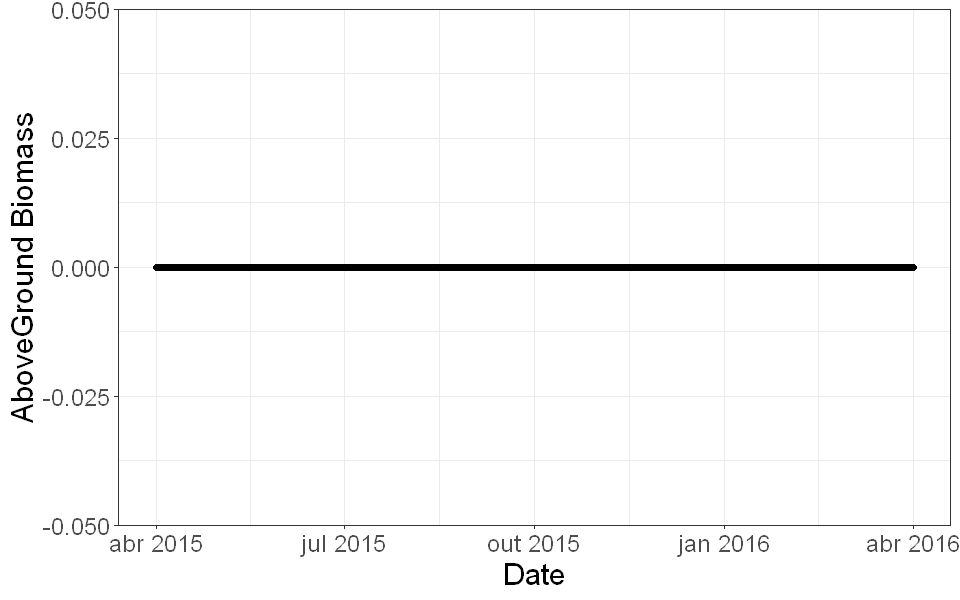

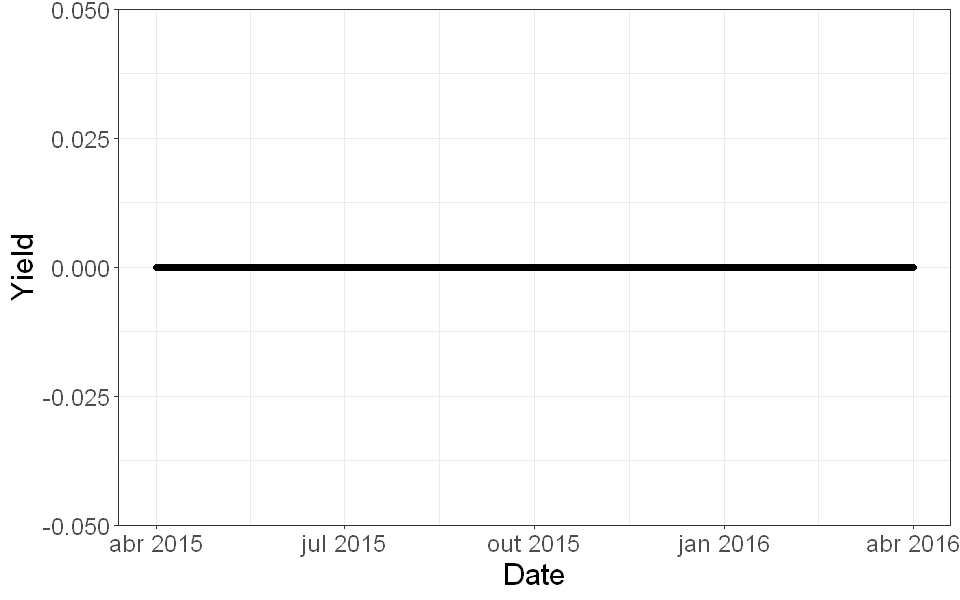

In [38]:
# Define the size of the chart
options(repr.plot.width=8, repr.plot.height=5)

# Plot Biomass
ggplot(apsim_results) +
#   geom_line(aes(x = as.Date(Clock.Today), y = Maize.AboveGround.Wt)) +
  geom_point(aes(x = as.Date(Clock.Today), y = Soybean.AboveGround.Wt)) +
  theme_bw() +
  labs(x = "Date", y = "AboveGround Biomass") + 
  theme(text = element_text(size = 18))

# Plot Yield
ggplot(apsim_results) +
#   geom_line(aes(x = as.Date(Clock.Today), y = Yield)) +
  geom_point(aes(x = as.Date(Clock.Today), y = Yield)) +
  theme_bw() +
  labs(x = "Date", y = "Yield") + 
  theme(text = element_text(size = 18))

We can also use **dplyr** to convert this dataframe to a tibble format and plot all data using **ggplot**:

Date,variable,value
<date>,<chr>,<dbl>
2015-04-01,Soybean.AboveGround.N,0
2015-04-01,Soybean.AboveGround.Wt,0
2015-04-01,Soybean.Grain.NConc,0
2015-04-01,Soybean.Grain.Total.N,0
2015-04-01,Soybean.Grain.Total.Wt,0
2015-04-01,Soybean.Total.Wt,0


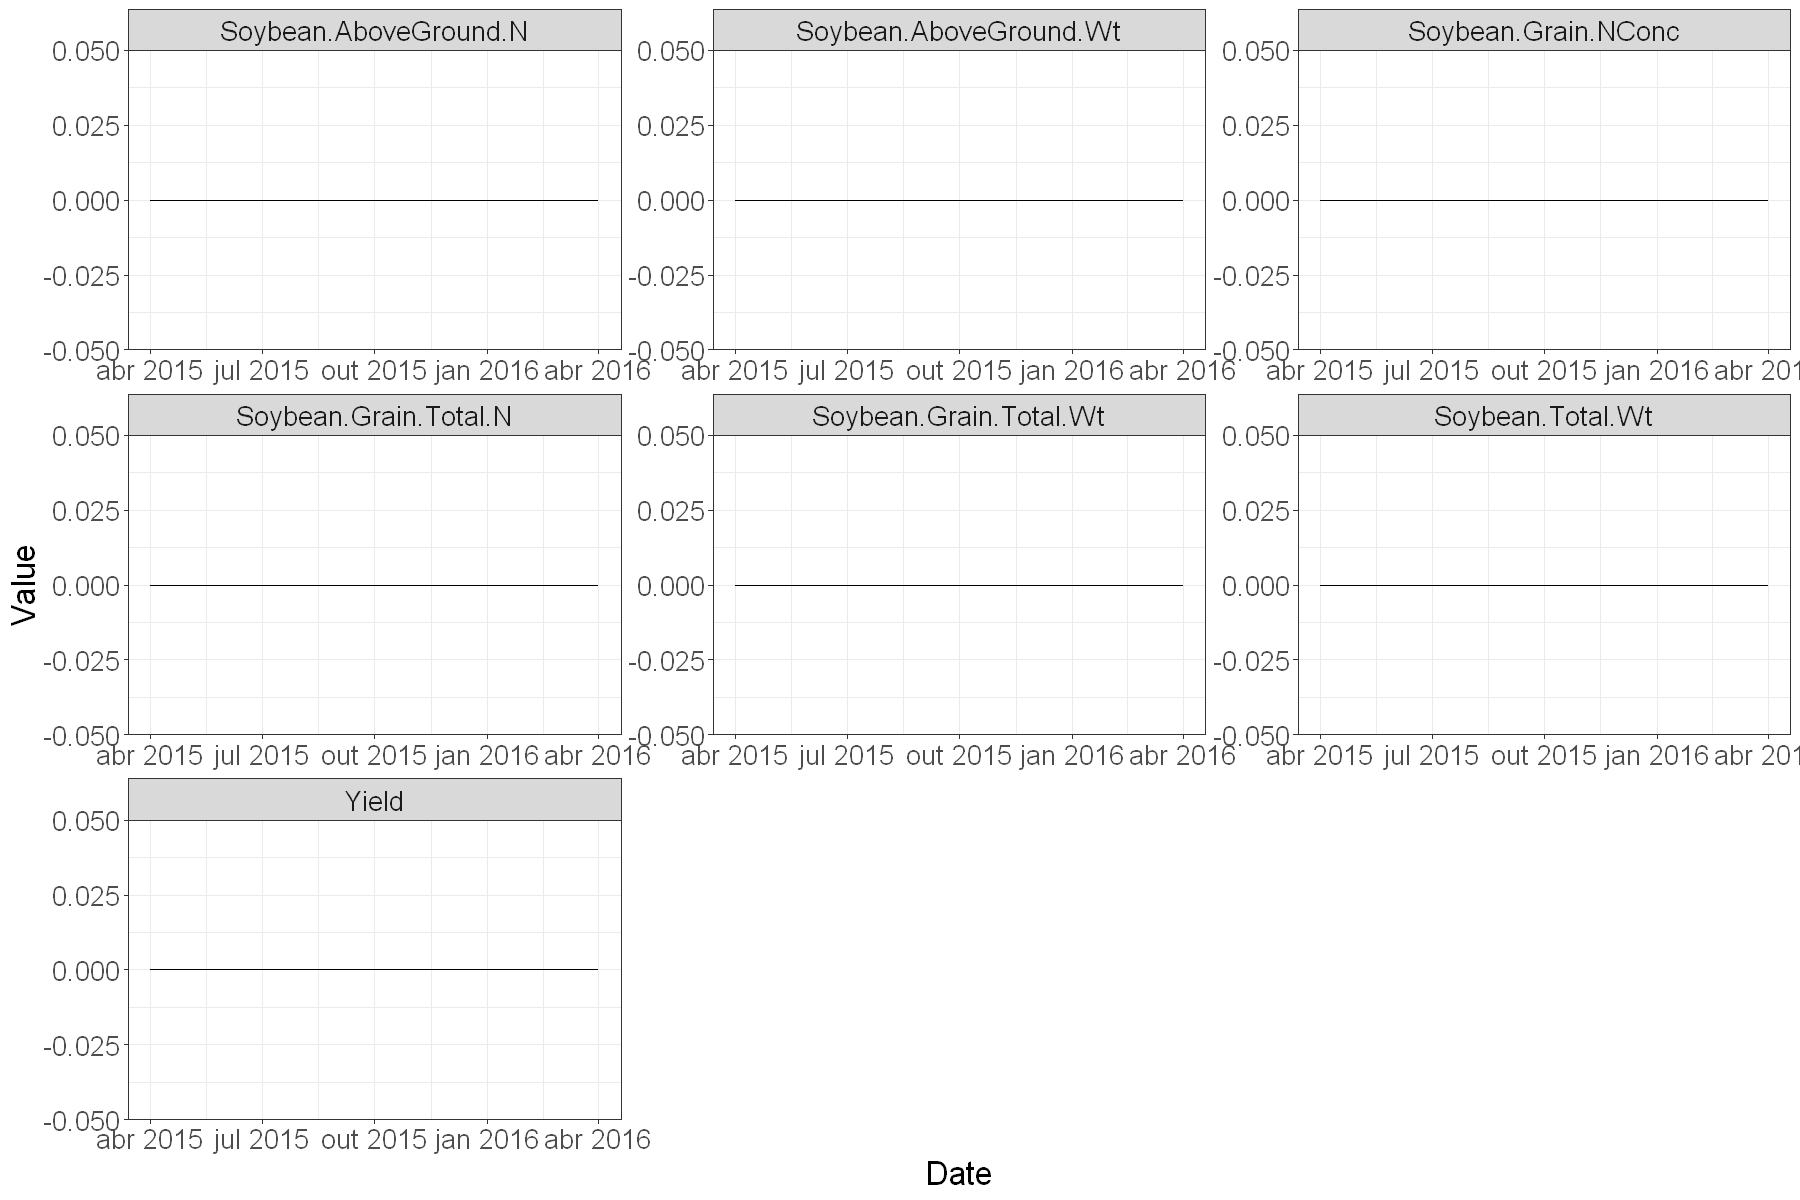

In [42]:
apsim_results_tibble <- apsim_results %>%
    select(Date, Soybean.AboveGround.N, Soybean.AboveGround.Wt, Soybean.Grain.NConc, Soybean.Grain.Total.N, Soybean.Grain.Total.Wt, Soybean.Total.Wt, Yield) %>%
    pivot_longer(cols = 2:ncol(.), names_to = "variable", values_to = "value")

head(apsim_results_tibble)


options(repr.plot.width=15, repr.plot.height=10)

ggplot(apsim_results_tibble) +
  geom_line(aes(x = Date, y = value)) +
  theme_bw() +
  facet_wrap(variable ~ ., scales="free") + 
  labs(x = "Date", y = "Value") + 
  theme(text = element_text(size = 20))